In [42]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [44]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [45]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/2. Big Data 분석'

In [46]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 연습

#### 패키지 불러오기

In [47]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

## 데이터 구성하기

In [48]:
df_raw = pd.read_csv("HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [49]:
# Data 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [50]:
# Data 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


## 데이터 전처리

#### 결측치 처리

In [51]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [52]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [53]:
# 결측치 재확인
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### 참조:범주형 변수 수준 확인

In [54]:
# 명목형 변수 목록
obj_cols = df_raw.select_dtypes("object").columns

for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

REASON : 2
JOB : 6


#### 데이터 분할

In [55]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


## 로지스틱 회귀모델 및 회귀계수 검토

In [56]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + 
                    DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                  0.2257
Time:                        14:36:23   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [57]:
# 회귀계수가 유의한 변수만 사용한 모델
# 회귀계수 유의성 기준 제외변수: REASON, LOAN, MORTDUE, VALUE, YOJ 
log_model = Logit.from_formula("""BAD ~ C(JOB) +  DEROG + 
                DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                  0.2237
Time:                        14:36:24   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1652      0.534     -9.664      0.000      -6.213      -4.118
C(JOB)[T

## 예측 및 성능 평가

#### 예측

In [58]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능 
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_test_class)),"\n")

Train 예측 결과 
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix: 
[[2368   14]
 [ 192   49]] 

Test 예측 결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Matrix: 
[[1016    5]
 [  81   23]] 



#### 평가

In [59]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["BAD"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"],y_pred_train_class)),"\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_test_class)),"\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.921

Confusion Matrix: 
[[2368   14]
 [ 192   49]] 

              precision    recall  f1-score   support

           0      0.925     0.994     0.958      2382
           1      0.778     0.203     0.322       241

    accuracy                          0.921      2623
   macro avg      0.851     0.599     0.640      2623
weighted avg      0.911     0.921     0.900      2623

Test 예측/분류 결과
Accuracy: 0.924

Confusion Matrix: 
[[1016    5]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.995     0.959      1021
           1      0.821     0.221     0.348       104

    accuracy                          0.924      1125
   macro avg      0.874     0.608     0.654      1125
weighted avg      0.916     0.924     0.903      1125



#### 참조:목표변수 label 지정

In [60]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print("Train 예측/분류 결과")
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["BAD"], y_pred_test_class, target_names=['승인', '거절'], digits=3))

print("Test 예측/분류 결과")
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["BAD"], y_pred_test_class, target_names=['승인', '거절'], digits=3))

Train 예측/분류 결과
              precision    recall  f1-score   support

          승인      0.926     0.995     0.959      1021
          거절      0.821     0.221     0.348       104

    accuracy                          0.924      1125
   macro avg      0.874     0.608     0.654      1125
weighted avg      0.916     0.924     0.903      1125

Test 예측/분류 결과
              precision    recall  f1-score   support

          승인      0.926     0.995     0.959      1021
          거절      0.821     0.221     0.348       104

    accuracy                          0.924      1125
   macro avg      0.874     0.608     0.654      1125
weighted avg      0.916     0.924     0.903      1125



## 결론 도출

<Axes: >

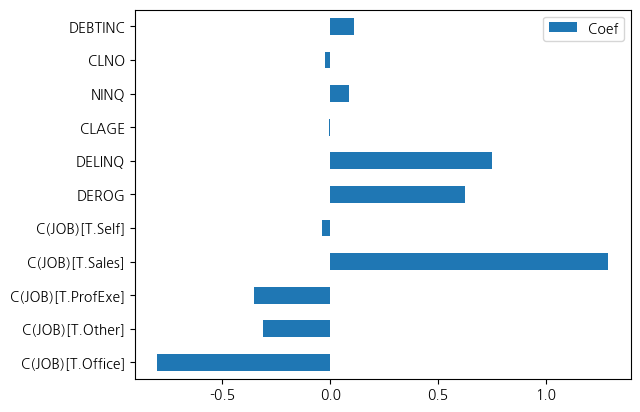

In [61]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

In [62]:
# 0번째=Intercept..
print(log_result.params.values[0:1])
print(log_model.exog_names[0:1])

[-5.16521246]
['Intercept']


#### 표준화 회귀 계수

In [63]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [64]:
# BAD 데이터를 0과 1로 변환(정수형), np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["BAD"] = np.where(df_scaled["BAD"]> 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [65]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                               test_size = 0.3, # test 데이터의 비율
                               random_state = 1234)  # random state

In [66]:
# from_formula 함수를 이용하여 변수 역할 지정
# scaled_log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + 
#         DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)

# 선정된 설명변수 기준
scaled_log_model = Logit.from_formula("""BAD ~ C(JOB) +  DEROG + 
                        DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                  0.2237
Time:                        14:36:50   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5153      0.197    -12.785      0.000      -2.901      -2.130
C(JOB)[T

<Axes: >

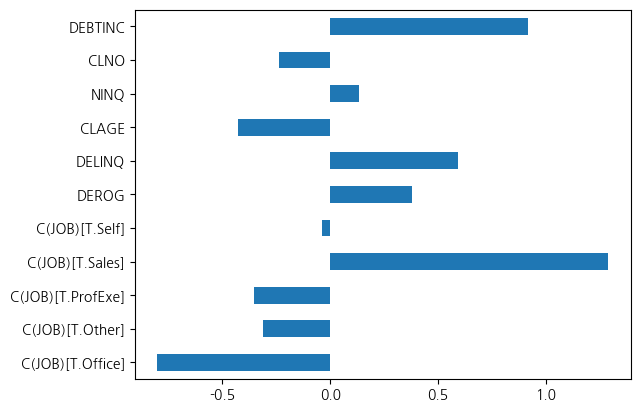

In [67]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

## End of 로지스틱회귀